# 동대문 종합시장 scraper

In [88]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup as bs

from pathlib import Path
from tqdm import tqdm

import itertools
import collections

In [2]:
CUR_PATH = Path('.').resolve()
DATA_PATH = CUR_PATH / 'data'
OUT_PATH = CUR_PATH / 'output'

In [3]:
catcode_list = [
    '10000000', # 원단
    '11000000', # 부자재
    '12000000', # 실
    '13000000', # 레이스
]

In [39]:
def make_url(catcode, page=1):
    
    return f'https://www.ddm-mall.com/store/store.php?page={page}&catcode={catcode}'

In [60]:
def get_div_list(catcode):
    div_list = []

    url = make_url(catcode, page=1)
    res = requests.get(url)
    res_bs = bs(res.content, 'html.parser')
    details = res_bs.find_all('div', {'class': 'storeTable'})
    div_list += details

    max_page = int(res_bs.find('a', {'class': 'page_next2'}).attrs['href'].split('&')[0][6:])

    for page in range(2, max_page+1):
        url = make_url(catcode, page=page)
        res = requests.get(url)
        res_bs = bs(res.content, 'html.parser')
        details = res_bs.find_all('div', {'class': 'storeTable'})
        div_list += details
    
    return div_list


In [65]:
def parse_div(div):
    store_name = div.find('h5')
    li_list = div.find_all('li')

    location = li_list[0].contents[1]
    category_1 = li_list[1].find('span', {'class': 'cate1'}).text
    category_2 = li_list[1].find('span', {'class': 'cate2'}).text
    
    try:
        hashtags_list = li_list[2].find_all('a', {'class': 'hashtag'})
        hashtags_list = [a.text for a in hashtags_list]
    except:
        print('no hashtag?')
        print(f'li_list: {li_list}')
        hashtags_list = []

    store_data = {
        'store_name': store_name,
        'location': location,
        'category_1': category_1,
        'category_2': category_2,
        'hashtags': hashtags_list,
    }

    return store_data

In [66]:
data = []

for catcode in tqdm(catcode_list):
    div_list = get_div_list(catcode)
    if div_list:
        div_data = [parse_div(div) for div in div_list]
        data += div_data
    else:
        print('empty div_list?')
        print(f'div_list: {div_list}')

 25%|██▌       | 1/4 [00:49<02:29, 49.95s/it]

no hashtag?
li_list: [<li><span class="title">위치</span>N동 3F 018호<a class="loca" data-prdcode="2201203496" data-sfloor="3" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span class="cate2">기타</span></li>]
no hashtag?
li_list: [<li><span class="title">위치</span>C동 5F 092호<a class="loca" data-prdcode="2201203126" data-sfloor="5" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span class="cate2">기타</span></li>]
no hashtag?
li_list: [<li><span class="title">위치</span>C동 2F 2110호<a class="loca" data-prdcode="2201202798" data-sfloor="2" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span class="cate2">기타</span></li>]
no hashtag?
li_list: [<li><span class="title">위치</span>B동 3F 3100호<a class="loca" data-prdcode="2201201965" data-sfloor="3" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span clas

 50%|█████     | 2/4 [01:21<01:17, 38.91s/it]

no hashtag?
li_list: [<li><span class="title">위치</span>A동 5F 047호<a class="loca" data-prdcode="2201200827" data-sfloor="5" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">부자재</span><span class="cate2">기타</span></li>]
no hashtag?
li_list: [<li><span class="title">위치</span>A동 5F 044호<a class="loca" data-prdcode="2201200824" data-sfloor="5" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">부자재</span><span class="cate2">기타</span></li>]


100%|██████████| 4/4 [01:41<00:00, 25.40s/it]


In [71]:
df = pd.DataFrame(data)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_name  2947 non-null   object
 1   location    2947 non-null   object
 2   category_1  2947 non-null   object
 3   category_2  2947 non-null   object
 4   hashtags    2947 non-null   object
dtypes: object(5)
memory usage: 115.2+ KB


실수로 bs obj 로 몇 개 들어가서 다 text 꺼내줌. 

In [75]:
df['store_name'] = df['store_name'].apply(lambda bs_obj: bs_obj.text)

In [78]:
df['location'] = df['location'].apply(lambda bs_obj: bs_obj.text)

In [79]:
df

,store_name,location,category_1,category_2,hashtags
0,포비전,C동 2F 2015-1호,원단,교직물,[#원단]
1,루디아,N동 B1F 087호,원단,기타,"[#침구, #누비원단]"
2,형림사,N동 B1F 046호,원단,화섬,"[#침구, #화섬]"
3,형림사,N동 B1F 017호,원단,화섬,"[#침구, #누비]"
4,한길상사,N동 B1F 003호,원단,기타,"[#심지, #부직포]"
...,...,...,...,...,...
2942,영도트림아트,A동 2F 2036호,레이스,자수레이스,[#레이스]
2943,제니텍스,A동 2F 2032호,레이스,랏셀,[#레이스]
2944,제니텍스,A동 2F 2031호,레이스,비즈레이스,[##레이스 #랏셀레이스 #자수레이스 #면레이스 #번아웃레이스 #띠레이스 #원단 #...
2945,제니텍스,A동 2F 2030호,레이스,자수레이스,"[#레이스, #랏셀레이스, #자수레이스, #면레이스, #번아웃레이스, #띠레이스, ..."


In [80]:
df.to_pickle('dongdaemoon_data.pickle')

In [81]:
df.to_csv('동대문데이터.csv')

In [89]:
hashtags = list(df['hashtags'].values)

In [101]:
c = collections.Counter(itertools.chain(*hashtags))

In [109]:
hashtag_count_df = pd.DataFrame(c.items(), columns=['hashtag', 'count'])
hashtag_count_df = hashtag_count_df.sort_values(by='count', ascending=False, ignore_index=True)
hashtag_count_df.head(30)

,hashtag,count
0,#화섬,341
1,#레이스,286
2,#액세서리,141
3,#직물,137
4,#의류부자재,123
5,#원사,103
6,#부자재,99
7,#뜨개,98
8,#면직물,88
9,#원단,86


<AxesSubplot:>

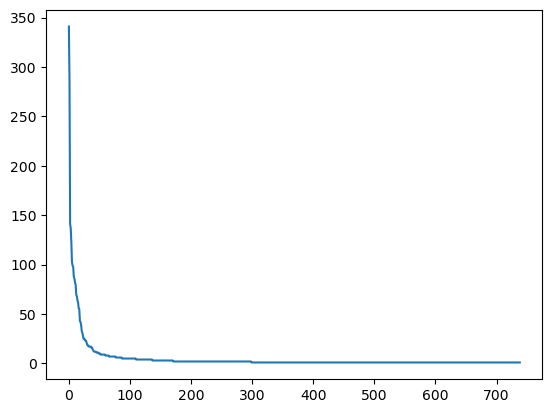

In [108]:
hashtag_count_df['count'].plot()